In [18]:
import pandas as pd
import seaborn as sns

In [15]:
from sklearn.metrics import confusion_matrix

# y_true = ground truth labels (0 or 1)
# y_pred = model predictions (0 or 1)

def print_confusion_matrix(y_true, y_pred):

    cm = confusion_matrix(y_true, y_pred, labels=[1, 0])

    # Extract elements:
    TP = cm[0, 0]
    FN = cm[0, 1]
    FP = cm[1, 0]
    TN = cm[1, 1]

    print("Confusion Matrix (2x2):")
    print(f"                Pred 1    Pred 0")
    print(f"Actual 1        {TP:6}    {FN:6}")
    print(f"Actual 0        {FP:6}    {TN:6}")

In [3]:
df_traing_last = pd.read_csv(r'D:\sim-bench\outputs\phototriage_multifeature\hyperparameter_search\search_20251205_100359\paper_exact_20251205_100359\train_labels_epoch16.csv')
df_validation_last = pd.read_csv(r'D:\sim-bench\outputs\phototriage_multifeature\hyperparameter_search\search_20251205_100359\paper_exact_20251205_100359\validation_labels_epoch16.csv')

In [39]:
from sim_bench.datasets.keyword_labels import merge_keyword_labels, load_keyword_labels


# Or load labels separately
labels_df = load_keyword_labels()

In [38]:
df_traing_last.head()

img1           img2  true_winner  pred_prob  pred_winner  correct  \
0  000001-01.JPG  000001-02.JPG            1   0.316991            1     True   
1  000001-01.JPG  000001-03.JPG            1   0.249609            1     True   
2  000001-02.JPG  000001-04.JPG            0   0.596424            0     True   
3  000001-03.JPG  000001-01.JPG            0   0.786473            0     True   
4  000001-03.JPG  000001-02.JPG            0   0.607555            0     True   

   series_id  majority_label  label_sharpness  label_exposure_quality  \
0          1               1                1                       0   
1          1               2                0                       2   
2          1               1                0                       1   
3          1               2                0                       1   
4          1               2                0                       0   

   label_lighting_quality  label_motion_blur  label_composition  
0                       0                  0                  0  
1                       0                  0                  0  
2                       0                  0                  0  
3                       0                  0                  1  
4                       0                  0                  0

In [21]:
df_traing_last.columns

Index(['img1', 'img2', 'true_winner', 'pred_prob', 'pred_winner', 'correct',
       'series_id', 'majority_label', 'label_sharpness',
       'label_exposure_quality', 'label_lighting_quality', 'label_motion_blur',
       'label_composition'],
      dtype='object')

In [29]:
df_train_series_stats = df_traing_last.groupby('series_id').agg(
    correct_mean=('correct', 'mean'),
    size=('series_id', 'size')
).reset_index()
df_train_series_stats['correct_mean_50'] = df_train_series_stats['correct_mean'] > 0.5
df_train_series_stats['correct_mean_60'] = df_train_series_stats['correct_mean'] > 0.6
df_train_series_stats['correct_mean_70'] = df_train_series_stats['correct_mean'] > 0.7
df_train_series_stats.sort_values(by='size',ascending=False).head(30)

series_id  correct_mean  size  correct_mean_50  correct_mean_60  \
383        631      0.944444    36             True             True   
289        471      0.925926    27             True             True   
207        358      0.846154    26             True             True   
206        357      0.840000    25             True             True   
233        399      0.956522    23             True             True   
1            2      0.818182    22             True             True   
86         142      0.863636    22             True             True   
25          43      0.857143    21             True             True   
341        567      0.857143    21             True             True   
43          71      0.800000    20             True             True   
234        400      0.750000    20             True             True   
248        417      1.000000    20             True             True   
44          72      1.000000    19             True             True   
131        229      1.000000    19             True             True   
94         154      0.947368    19             True             True   
171        297      0.789474    19             True             True   
287        469      0.777778    18             True             True   
374        618      0.777778    18             True             True   
88         144      0.937500    16             True             True   
203        354      1.000000    16             True             True   
42          70      0.750000    16             True             True   
335        554      0.812500    16             True             True   
209        362      0.800000    15             True             True   
357        589      0.933333    15             True             True   
54          87      0.666667    15             True             True   
329        544      0.866667    15             True             True   
144        248      0.857143    14             True             True   
311        506      0.714286    14             True             True   
193        331      0.928571    14             True             True   
330        546      1.000000    14             True             True   

     correct_mean_70  
383             True  
289             True  
207             True  
206             True  
233             True  
1               True  
86              True  
25              True  
341             True  
43              True  
234             True  
248             True  
44              True  
131             True  
94              True  
171             True  
287             True  
374             True  
88              True  
203             True  
42              True  
335             True  
209             True  
357             True  
54             False  
329             True  
144             True  
311             True  
193             True  
330             True

In [30]:
df_train_series_stats.groupby(['correct_mean_70'])['series_id'].count()


correct_mean_70
False     971
True     2495
Name: series_id, dtype: int64

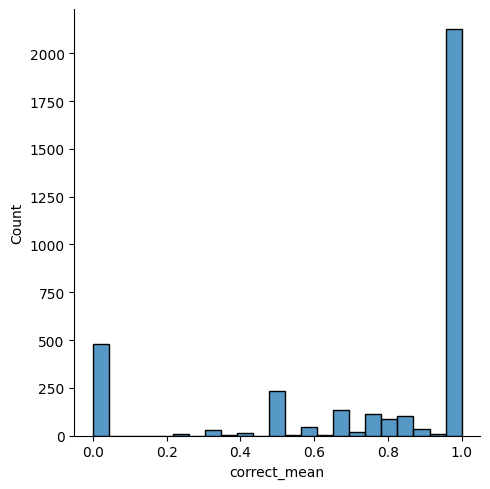

In [27]:
sns.displot(x='correct_mean',data=df_train_series_stats)

In [35]:
df_validation_last.columns

Index(['img1', 'img2', 'true_winner', 'pred_prob', 'pred_winner', 'correct',
       'series_id', 'majority_label', 'label_sharpness',
       'label_exposure_quality', 'label_lighting_quality', 'label_motion_blur',
       'label_composition'],
      dtype='object')

D:\sim-bench\sim_bench\datasets\visualize_phototriage_predictions.py:187: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
D:\sim-bench\sim_bench\datasets\visualize_phototriage_predictions.py:187: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
D:\sim-bench\sim_bench\datasets\visualize_phototriage_predictions.py:187: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\sim-bench\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\sim-bench\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\sim-bench\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font

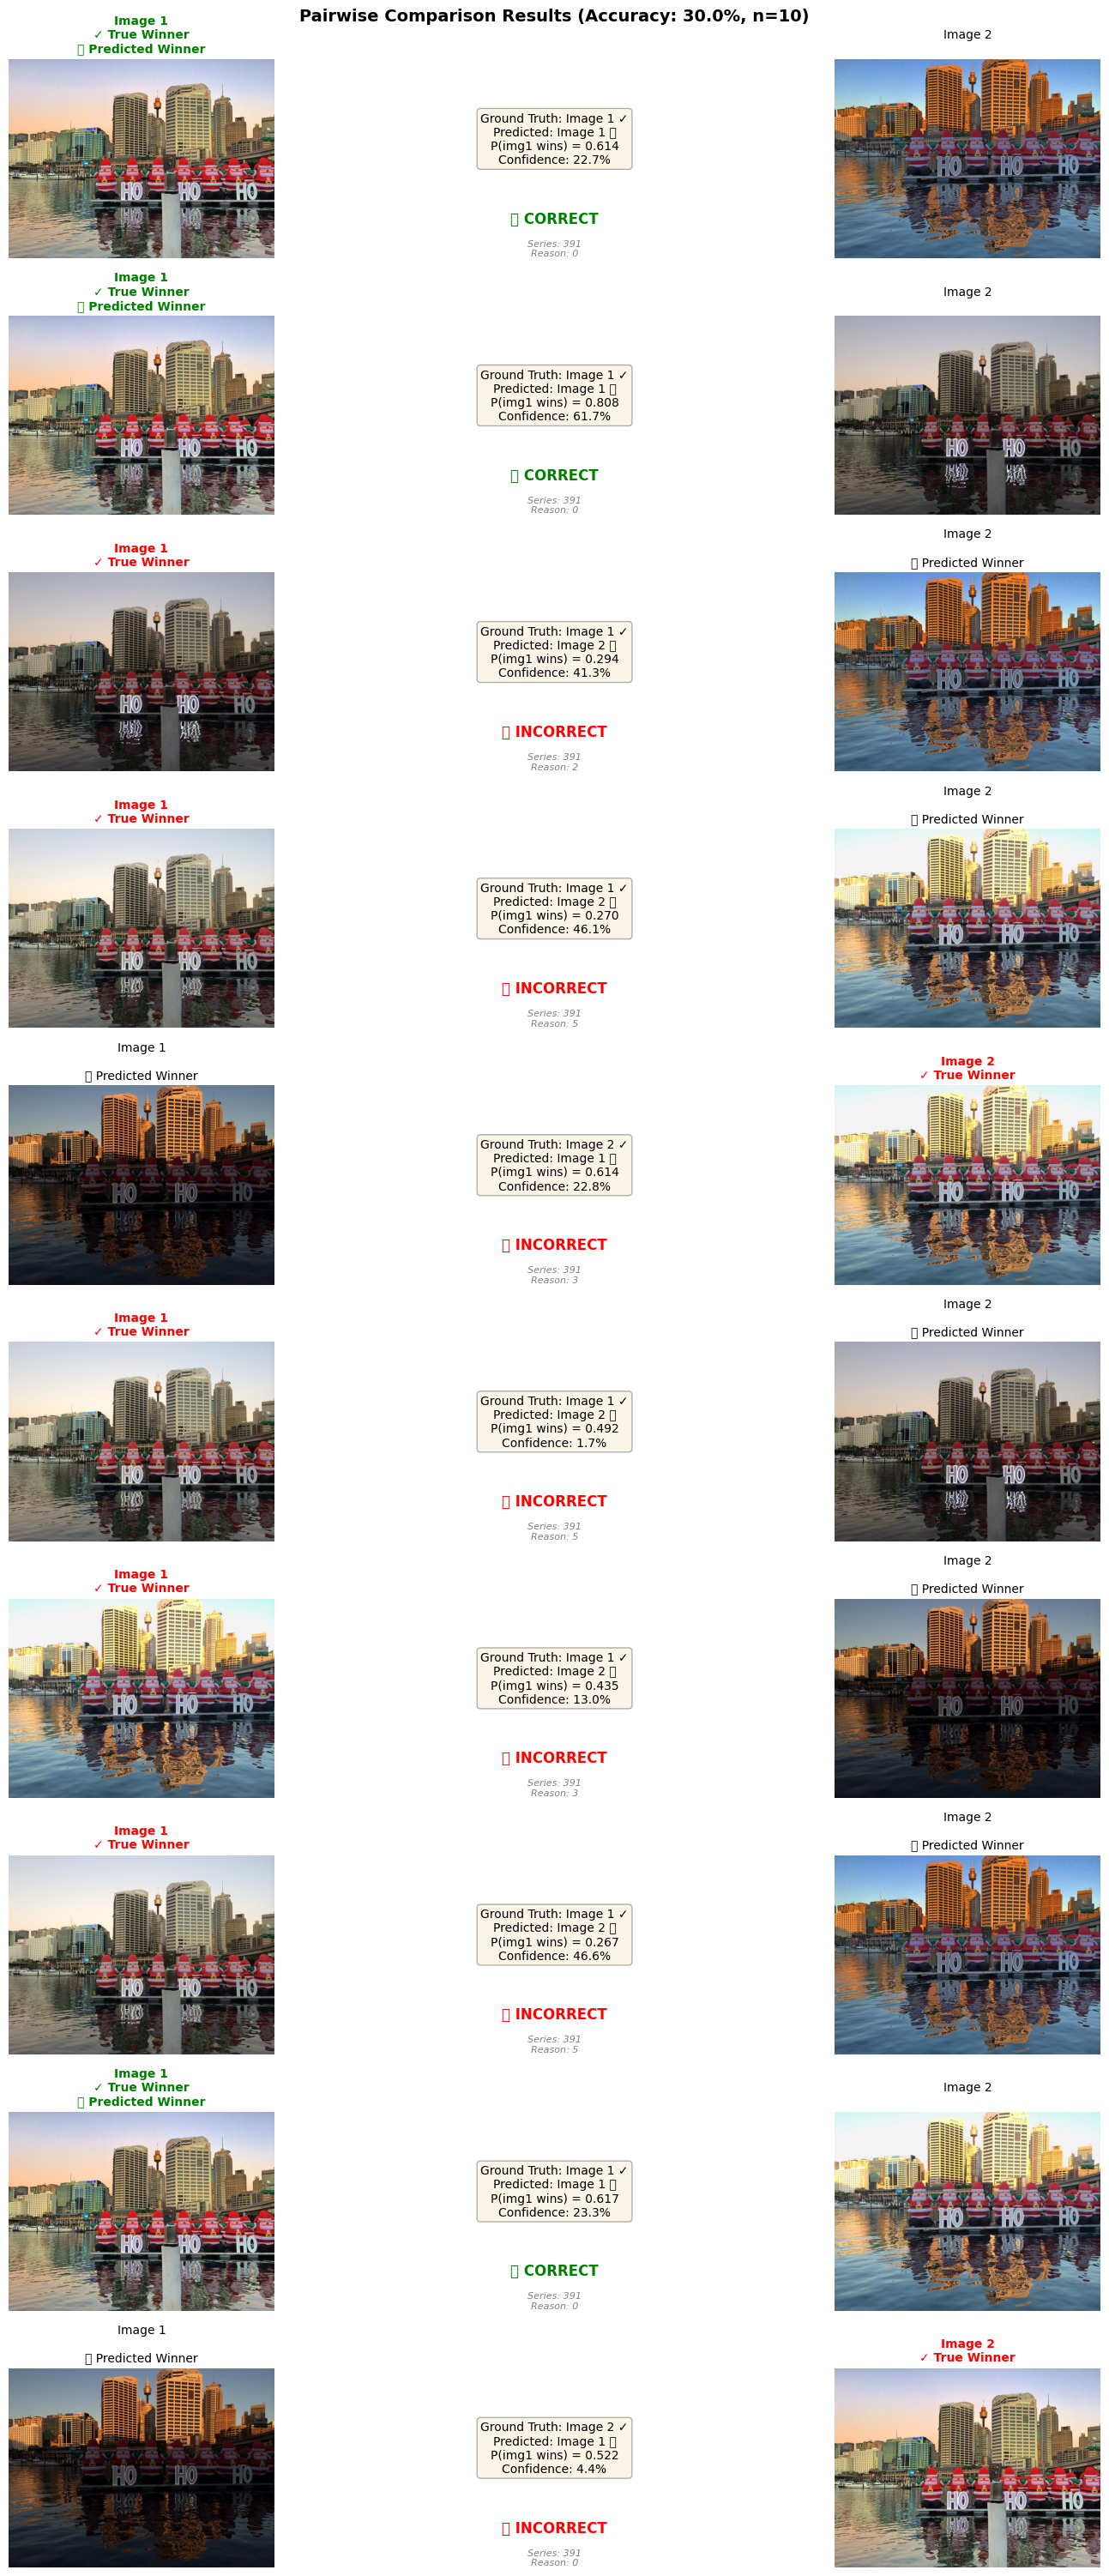

In [37]:
from sim_bench.datasets.visualize_phototriage_predictions import visualize_prediction_results

# Load your predictions
# Visualize 10 random pairs
fig = visualize_prediction_results(df_validation_last.query("series_id==391"), num_samples=10)


In [28]:
df_validation_series_stats = df_validation_last.groupby('series_id').agg(
    correct_mean=('correct', 'mean'),
    size=('series_id', 'size')
).reset_index()
df_validation_series_stats.sort_values(by='size',ascending=False).head(30)

series_id  correct_mean  size
26         391      0.352941    17
23         352      0.583333    12
29         481      0.750000    12
25         367      0.272727    11
21         341      0.545455    11
144       2029      0.800000    10
42         606      0.111111     9
72        1029      0.555556     9
270       3882      0.666667     9
108       1546      0.777778     9
182       2547      0.777778     9
283       4047      0.750000     8
326       4538      0.625000     8
126       1749      0.500000     8
139       1916      0.500000     8
227       3308      0.625000     8
93        1259      0.714286     7
208       2919      0.714286     7
13         182      0.285714     7
34         524      0.428571     7
33         522      0.428571     7
145       2048      0.428571     7
420       5766      0.285714     7
71        1019      1.000000     6
177       2482      0.500000     6
39         566      0.166667     6
38         556      0.833333     6
52         704      0.333333     6
97        1369      0.833333     6
151       2096      0.666667     6

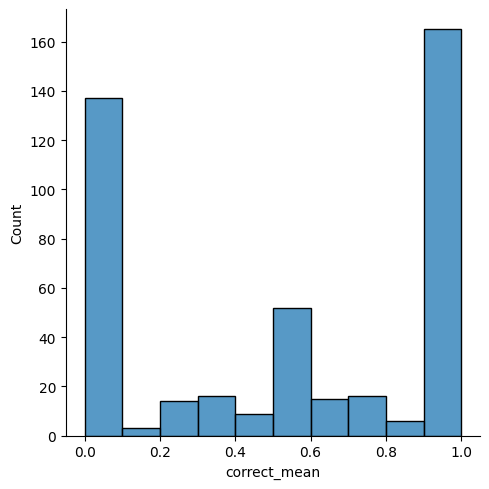

In [31]:
sns.displot(x='correct_mean',data=df_validation_series_stats)

In [8]:
df_validation_last['true_winner'].value_counts()

true_winner
0    576
1    538
Name: count, dtype: int64

In [9]:
df_validation_last['pred_winner'].value_counts()

pred_winner
0    586
1    528
Name: count, dtype: int64

In [ ]:
df_traing_last['true_winner'].value_counts()

true_winner
0    5099
1    4661
Name: count, dtype: int64

In [16]:
print_confusion_matrix(df_traing_last['true_winner'], df_traing_last['pred_winner'])

Confusion Matrix (2x2):
                Pred 1    Pred 0
Actual 1          3687       974
Actual 0           927      4172


In [17]:
print_confusion_matrix(df_validation_last['true_winner'], df_validation_last['pred_winner'])

Confusion Matrix (2x2):
                Pred 1    Pred 0
Actual 1           269       269
Actual 0           259       317


In [ ]:
df_traing_last.groupby('series_id')['pred_winner'].value_counts()

In [6]:
df_traing_last['pred_winner'].value_counts()

pred_winner
0    5146
1    4614
Name: count, dtype: int64

In [13]:
df_traing_last['series_id'].nunique()

3466

In [12]:
df_validation_last['series_id'].nunique()

433

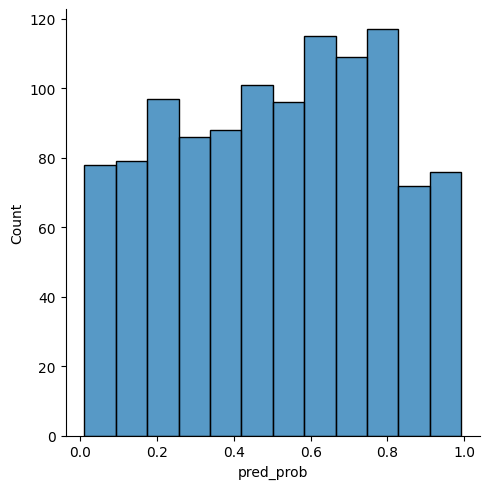

In [20]:
sns.displot(x='pred_prob',data=df_validation_last)

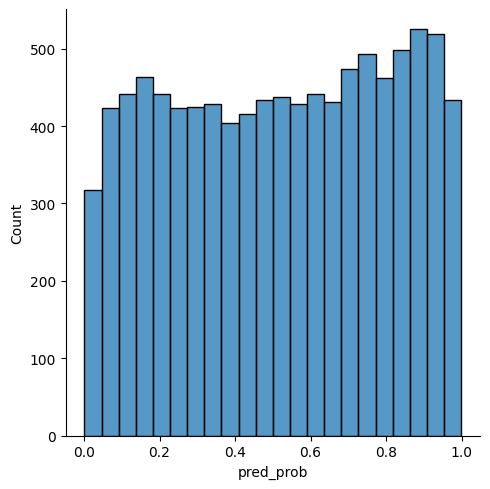

In [19]:
sns.displot(x='pred_prob',data=df_traing_last)